# TMDB Movie Data Analysis

## Introduction

In this project we will be investigating the TMDB Dataset which is providing us with various useful information regarding movies and how good or bad they performed both qualitatively and quantitatively. Our aim is to get some insight into what makes movies get better reviews and get more viewers and hence make more revenues.

## Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [58]:
df = pd.read_csv('tmdb_movies_data.csv')

## Head entries of df

In [59]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


## About the Dataset

1. imdb_id: It represents imdb_id of the movie in the IMDB Database.
2. popularity: It represents the popularity score of the movie.
3. budget: It represents the budget of the movie in dollars.
4. revenue: It represents the total revenue collected by the movie in dollars.
5. original_title: It represents the title of the movie.
6. cast: It tells the actors who acted in that movie.
7. director: It tells the director of the movie.
8. overview: It tells the overview of the plot of the movie.
9. runtime: It tells the overall runtime of the movie in minutes
10. gehres: It represents the genres the movie represents.
11. release_date: It tells the date of release of the movie.
12. release_year: It tells the year in which the movie was released.

## Data Wrangling

In [60]:
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation S

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [62]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date          10

In [63]:
# keeping only those columns which are needed for further analysis.
md = df[['popularity','budget','revenue','original_title','runtime','genres','vote_count','vote_average','release_year']]

In [64]:
# Creating profit column by the formula (profit = revenue - budget)
md['profit'] = md['revenue'] - md['budget']

C:\Users\RITIKA SINGH\AppData\Local\Temp\ipykernel_30540\2617947930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md['profit'] = md['revenue'] - md['budget']


In [65]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   genres          10842 non-null  object 
 6   vote_count      10865 non-null  int64  
 7   vote_average    10865 non-null  float64
 8   release_year    10865 non-null  int64  
 9   profit          10865 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 933.7+ KB


In [66]:
md.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,2.520261e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,9.659103e+07
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,-4.139124e+08
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,9.092453e+06
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,2.544506e+09


In [67]:
# Calculating the null values in the dataset of each columns
md.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
profit             0
dtype: int64

In [68]:
# Droping only the null values from the genres column.
md.dropna(subset=['genres'],inplace=True)

C:\Users\RITIKA SINGH\AppData\Local\Temp\ipykernel_30540\2871320080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md.dropna(subset=['genres'],inplace=True)


In [69]:
md.isnull().sum()
# Now genres column has no null values

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
profit            0
dtype: int64

In [70]:
md.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1316249360


In [71]:
# Spliting the genres column seperately and convert it into pandas series and then join it to the main dataframe.
s = md['genres'].str.split('|').apply(pd.Series,1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del md['genres']
md = md.join(s)

C:\Users\RITIKA SINGH\AppData\Local\Temp\ipykernel_30540\4092432130.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  s = md['genres'].str.split('|').apply(pd.Series,1).stack()


In [72]:
md.head()

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,profit,genres
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,228436354,Action


In [73]:
# now the rows of md has increased
md.shape

(26955, 10)

## Correlation between Dataset

<Axes: >

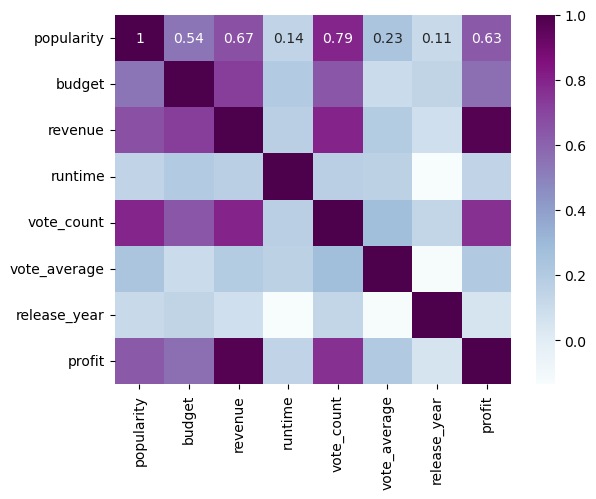

In [74]:
# Calculating correlation by droping the string columns and then inserting the heatmap graph for clear understanding
corr = md.drop(['original_title','genres'],axis=1,inplace=False).corr()
sns.heatmap(corr,annot=True,cmap='BuPu')

## Exploratory Data Analysis

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'revenue'}>],
       [<Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'profit'}>, <Axes: >]], dtype=object)

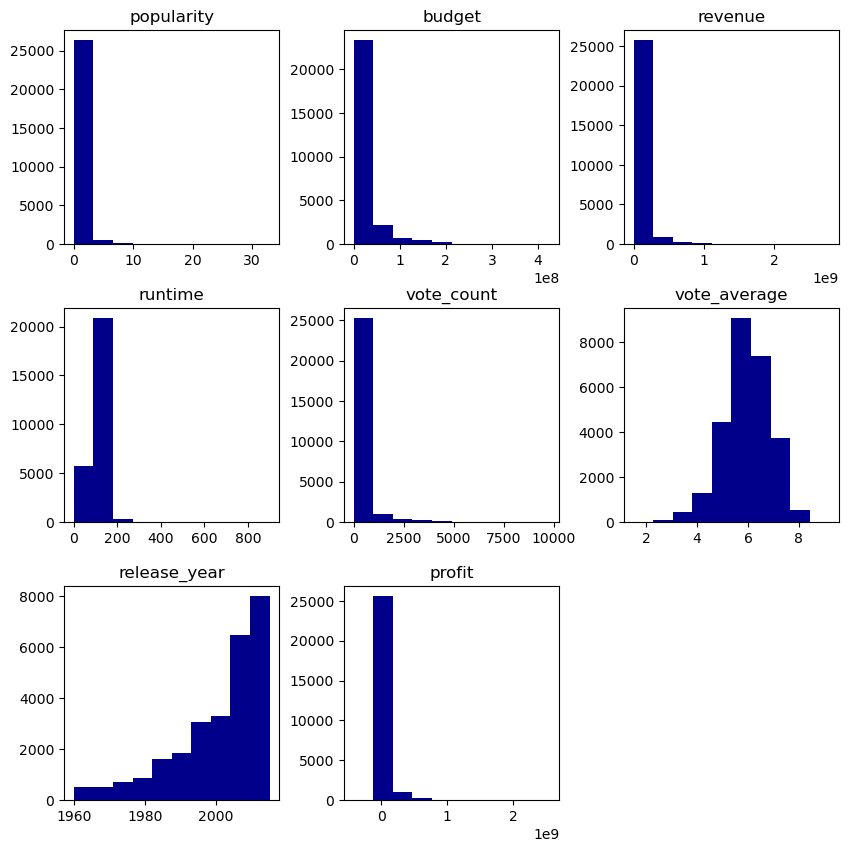

In [75]:
# Look at the histograms to get idea of how variables are distributed overall)
md.hist(color='DarkBlue',figsize=(10,10),grid=False)

#### All the variables are skewed. The only variable that is closed to a normal distribution is vote average.

## Movies Characteristics

In [76]:
# Which movie has a maximum budget and how much ?
max_budget = md['budget'].max()
print(max_budget)
print(md[md['budget']==max_budget]['original_title'].unique())

425000000
["The Warrior's Way"]


In [77]:
# Which movie has a maximum profit and how much ?
max_profit = md['profit'].max()
print(max_profit)
print(md[md['profit']==max_profit]['original_title'].unique())

2544505847
['Avatar']


In [78]:
# Which movie has a maximum popularity and how much ?
max_pop = md['popularity'].max()
print(max_pop)
print(md[md['popularity']==max_pop]['original_title'].unique())

32.985763
['Jurassic World']


In [79]:
# Which movie has a maximum vote and how much ?
max_vote = md['vote_count'].max()
print(max_vote)
print(md[md['vote_count']==max_vote]['original_title'].unique())

9767
['Inception']


In [80]:
# Which movie has least budget and how much ?
min_budget = md['budget'].min()
print(min_budget)
print(md[md['budget']==min_budget]['original_title'].unique())

0
['Mr. Holmes' 'Solace' 'Beyond the Reach' ... 'Grand Prix'
 'Beregis Avtomobilya' "What's Up, Tiger Lily?"]


In [81]:
# Which movie has least profit and how much ?
min_profit = md['profit'].min()
print(min_profit)
print(md[md['profit']==min_profit]['original_title'].unique())

-413912431
["The Warrior's Way"]


In [82]:
# Which movie has least popularity and how much ?
min_pop = md['popularity'].min()
print(min_pop)
print(md[md['popularity']==min_pop]['original_title'].unique())

6.5e-05
['North and South, Book I']


In [83]:
# Which movie has least vote and how much ?
min_vote = md['vote_count'].min()
print(min_vote)
print(md[md['vote_count']==min_vote]['original_title'].unique())

10
['The Unspoken' 'Crown for Christmas' 'The Girl in the Photographs'
 'Jesse Stone: Lost in Paradise' 'Bridgend' 'Night Owls' 'The Sand'
 'A Hitman in London' 'Coconut Hero' 'The Inhabitants' 'Bastard'
 'Merry Kissmas' 'The Ouija Experiment 2: Theatre of Death' 'Big Sky'
 'Ominous' 'They Found Hell' 'Harry Price: Ghost Hunter' 'The Audition'
 'The House on Pine Street' 'Man vs. Snake' 'Once I Was a Beehive'
 'I Hate Christian Laettner' 'Avalanche Sharks'
 'The Coed and the Zombie Stoner' 'Viking: The Berserkers'
 'Age of Tomorrow' 'Cesar Chavez' 'Deep in the Darkness' 'The Identical'
 'Ribbit' '9 Kisses' 'Asthma' 'Sharktopus vs Pteracuda' 'Crawl or Die'
 "Trailer Park Boys: Don't Legalize It"
 'The Story of Frozen: Making a Disney Animated Classic' 'Inner Demons'
 'Midnight Sun' 'Billy Elliot: The Musical' 'Party Central'
 'Breakup Buddies' 'March or Die' 'Julia' 'The White Buffalo'
 'Rollercoaster' 'The Goodbye Girl' 'Opening Night'
 "Emmet Otter's Jug-Band Christmas" 'Nothing Perso

### Following are the Conclusion:

1. The Warrior's Way had the highest budget with 425 mio USD but has least profit than others.
2. Avatar made the most profit.
3. The most popular movie was Jurassic Worl
4. North and South Book-I, has covered least popularity than others.
5. Inception was the movie with the maximum vote count.un
6. The Warrior's Way had least profit.t.

## Grouping data by specific columns

In [84]:
# Group Data by genre column
md_genre = md.groupby(['genres'])

In [85]:
md_genre_profit = pd.DataFrame(md_genre['profit'].mean()).reset_index()
md_genre_profit.sort_values(by=['profit'], ascending = False)
# Calculate the mean profit of every genres

,genres,profit
1,Adventure,7.559417e+07
8,Fantasy,6.370107e+07
2,Animation,5.209628e+07
7,Family,4.907384e+07
15,Science Fiction,4.516788e+07
0,Action,4.506691e+07
18,War,2.671330e+07
4,Crime,2.470486e+07
17,Thriller,2.452072e+07
3,Comedy,2.422833e+07


In [86]:
md_genre_pop = pd.DataFrame(md_genre['popularity'].mean()).reset_index()
md_genre_pop.sort_values(by=['popularity'], ascending = False)

,genres,popularity
1,Adventure,1.154259
15,Science Fiction,1.001548
8,Fantasy,0.992840
0,Action,0.926274
2,Animation,0.852182
7,Family,0.786668
4,Crime,0.744930
17,Thriller,0.741563
18,War,0.727683
13,Mystery,0.690012


In [87]:
md_genre_budget = pd.DataFrame(md_genre['budget'].mean()).reset_index()
md_genre_budget.sort_values(by=['budget'], ascending = False)

,genres,budget
1,Adventure,3.754369e+07
8,Fantasy,3.261259e+07
0,Action,2.772782e+07
15,Science Fiction,2.497268e+07
7,Family,2.335934e+07
2,Animation,2.315978e+07
18,War,2.089189e+07
19,Western,1.897411e+07
10,History,1.859492e+07
4,Crime,1.766380e+07


In [88]:
md_genre_revenue = pd.DataFrame(md_genre['revenue'].mean()).reset_index()
md_genre_revenue.sort_values(by = ['revenue'], ascending = False)

,genres,revenue
1,Adventure,1.131379e+08
8,Fantasy,9.631366e+07
2,Animation,7.525606e+07
0,Action,7.279473e+07
7,Family,7.243318e+07
15,Science Fiction,7.014056e+07
18,War,4.760518e+07
4,Crime,4.236866e+07
17,Thriller,4.172842e+07
13,Mystery,4.021757e+07


genres
Action             2339
Adventure          1442
Animation           697
Comedy             3750
Crime              1337
Documentary         520
Drama              4672
Family             1211
Fantasy             899
Foreign             188
History             331
Horror             1580
Music               403
Mystery             796
Romance            1686
Science Fiction    1207
TV Movie            167
Thriller           2841
War                 269
Western             163
Name: original_title, dtype: int64


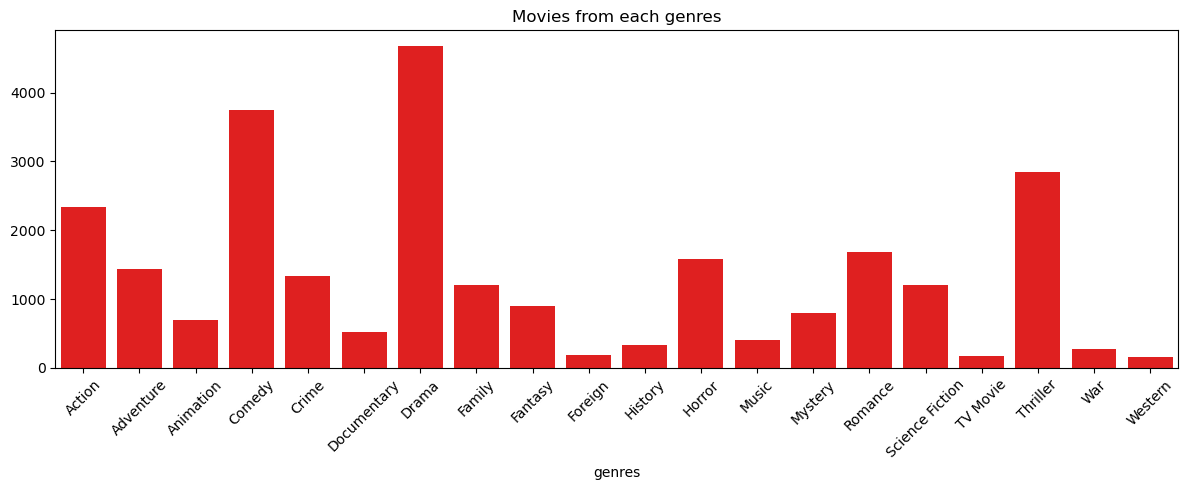

In [89]:
md_genre_movies = md_genre['original_title'].nunique()
print(md_genre_movies)
plt.figure(figsize=(12,5))
sns.barplot(x=md_genre_movies.index, y=md_genre_movies.values,color='red')
plt.title('Movies from each genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Following are the conclusions

1. Adventure genre has gained the maximum profit
2. Adventure genre has the maximum populalirty
3. Adventure genre has the maximum mean budget
4. Adventure genre has gained maximum mean revenue
5. Drama genre has made maximum movies

In [90]:
# Group data by release year
md_year = md.groupby('release_year')

In [91]:
md_year_budget = pd.DataFrame(md_year['budget'].mean()).reset_index()
md_year_budget.sort_values(by=['budget'], ascending= False)

,release_year,budget
39,1999,2.823636e+07
40,2000,2.818990e+07
37,1997,2.792262e+07
44,2004,2.692528e+07
41,2001,2.645833e+07
43,2003,2.481257e+07
42,2002,2.452649e+07
38,1998,2.402667e+07
50,2010,2.351972e+07
45,2005,2.320963e+07


In [92]:
md_year_profit = pd.DataFrame(md_year['profit'].mean()).reset_index()
md_year_profit.sort_values(by=['profit'], ascending = False)

,release_year,profit
55,2015,4.266900e+07
35,1995,4.186214e+07
32,1992,4.183219e+07
41,2001,3.856062e+07
52,2012,3.762732e+07
17,1977,3.681067e+07
44,2004,3.629104e+07
42,2002,3.500236e+07
51,2011,3.409647e+07
49,2009,3.360638e+07


In [93]:
md_year_revenue = pd.DataFrame(md_year['revenue'].mean()).reset_index()
md_year_revenue.sort_values(by=['revenue'], ascending = False)

,release_year,revenue
41,2001,6.501894e+07
44,2004,6.321632e+07
37,1997,6.052282e+07
42,2002,5.952885e+07
55,2015,5.927855e+07
35,1995,5.894094e+07
43,2003,5.799616e+07
52,2012,5.648600e+07
39,1999,5.512660e+07
51,2011,5.488428e+07


release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    136
1990    132
1991    133
1992    133
1993    178
1994    184
1995    174
1996    202
1997    192
1998    210
1999    223
2000    226
2001    241
2002    266
2003    281
2004    307
2005    363
2006    408
2007    438
2008    495
2009    531
2010    487
2011    540
2012    584
2013    655
2014    699
2015    627
Name: original_title, dtype: int64


C:\Users\RITIKA SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RITIKA SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


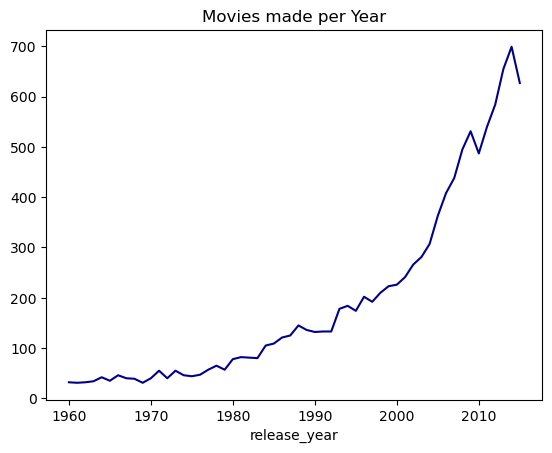

In [94]:
md_year_movies = md_year['original_title'].nunique()
print(md_year_movies)
sns.lineplot(x=md_year_movies.index, y=md_year_movies.values, color='darkblue')
plt.title('Movies made per Year')
plt.show()

#### In this graph we see that over time more and more movies were made per year. Starting at just 32 movies in 1960 up to 627 per year in 2015 with a max of 699 movies in 2014.

### Following are the Conclusions

1. Movies with the maximum mean budget were made in year 1999
2. Movies had the maximum mean profit in year 2015
3. Movies had the maximum mean revenue in year 2015
4. Maximum Movies were made in the year 2014

C:\Users\RITIKA SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RITIKA SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RITIKA SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RITIKA SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

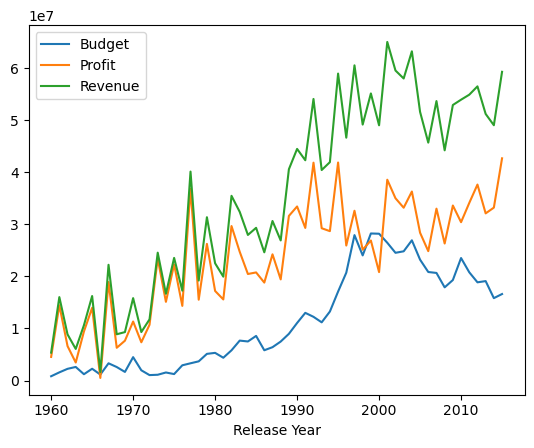

In [95]:
sns.lineplot(x=md_year_budget['release_year'].values, y=md_year_budget['budget'].values, label='Budget')
sns.lineplot(x=md_year_profit['release_year'].values, y=md_year_profit['profit'].values, label='Profit')
sns.lineplot(x=md_year_revenue['release_year'].values, y=md_year_revenue['revenue'].values, label='Revenue')
plt.legend()
plt.xlabel('Release Year')
plt.show()

#### In this chart above we can observe that revenue and profit developed almost in parallel untill the early 1980s. In the 1980s budget is increasing more sharply. Probably as a consequence the gap between revenue and profit is starting to emerge. 

#### At the end of the 1990s budget starts decreasing, probably due to technological progress, and therefore profit starts to increase again.

## Some Other Research

### 1. Which genre are the most common (number of movies made) ?

In [96]:
num_movies = md_genre.original_title.nunique().sort_values(ascending=False)
print(num_movies)

genres
Drama              4672
Comedy             3750
Thriller           2841
Action             2339
Romance            1686
Horror             1580
Adventure          1442
Crime              1337
Family             1211
Science Fiction    1207
Fantasy             899
Mystery             796
Animation           697
Documentary         520
Music               403
History             331
War                 269
Foreign             188
TV Movie            167
Western             163
Name: original_title, dtype: int64


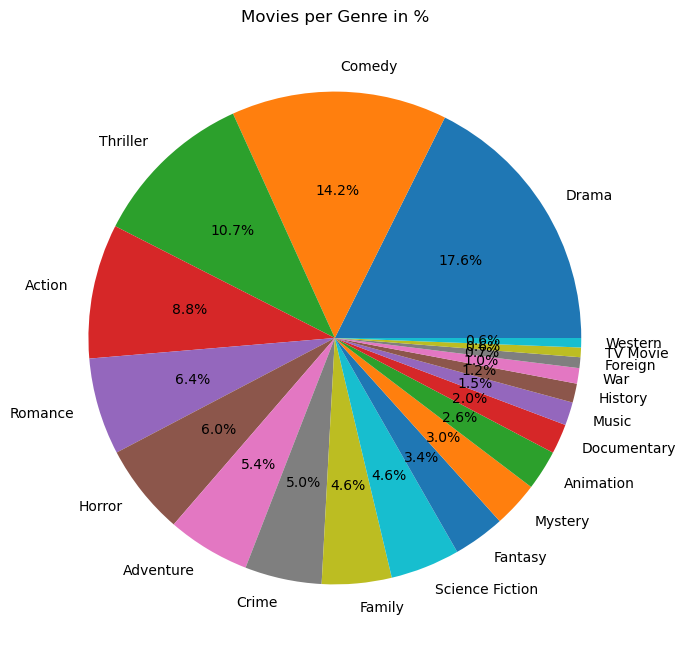

In [97]:
plt.figure(figsize=(8,8))
plt.pie(x=num_movies.values, labels=num_movies.index,autopct = '%1.1f%%')
plt.title('Movies per Genre in %')
plt.show()

#### Drama is the most common genre (17.6%) followed by Comedy (14.2%) and then Thriller (10.7%).

### 2. Which genres have high average budget and revenue ?

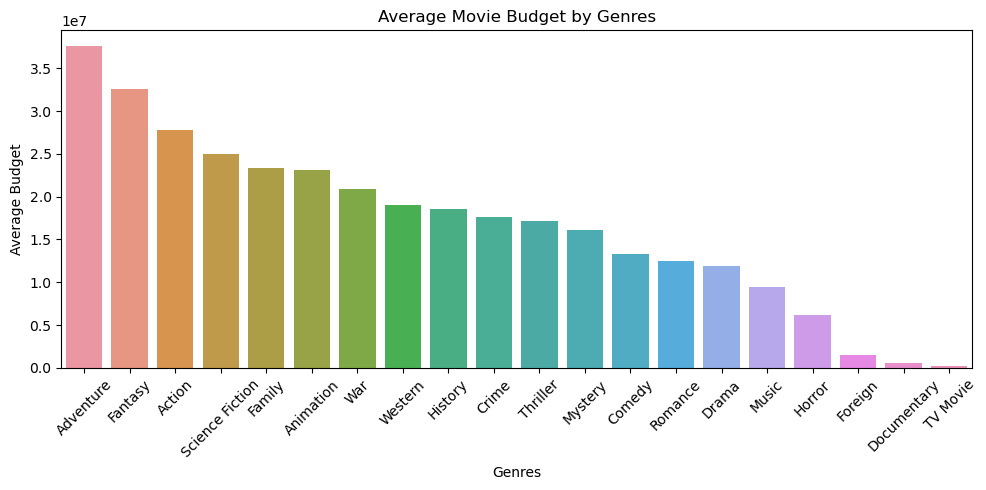

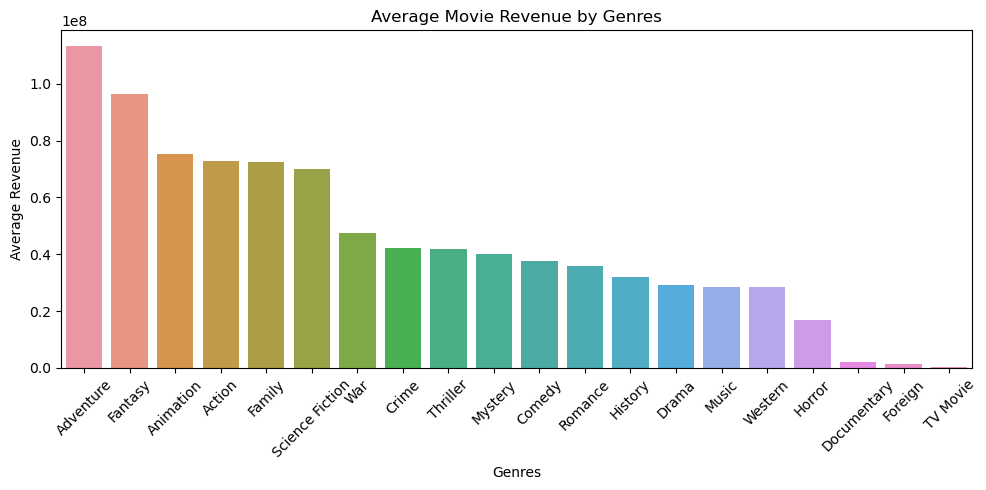

In [98]:
sort_budget = md_genre_budget.sort_values(by='budget',ascending=False)
sort_revenue = md_genre_revenue.sort_values(by='revenue',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='genres',y='budget',data=sort_budget)
plt.title('Average Movie Budget by Genres')
plt.xlabel('Genres')
plt.ylabel('Average Budget')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x='genres',y='revenue',data=sort_revenue)
plt.title('Average Movie Revenue by Genres')
plt.xlabel('Genres')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### In the graphs above we clearly see that the genre Adventure has both the highest Average Budget & Revenue. 
#### Fantasy comes second in budget & revenue.

### 3. Which genres have high Average Profit ?

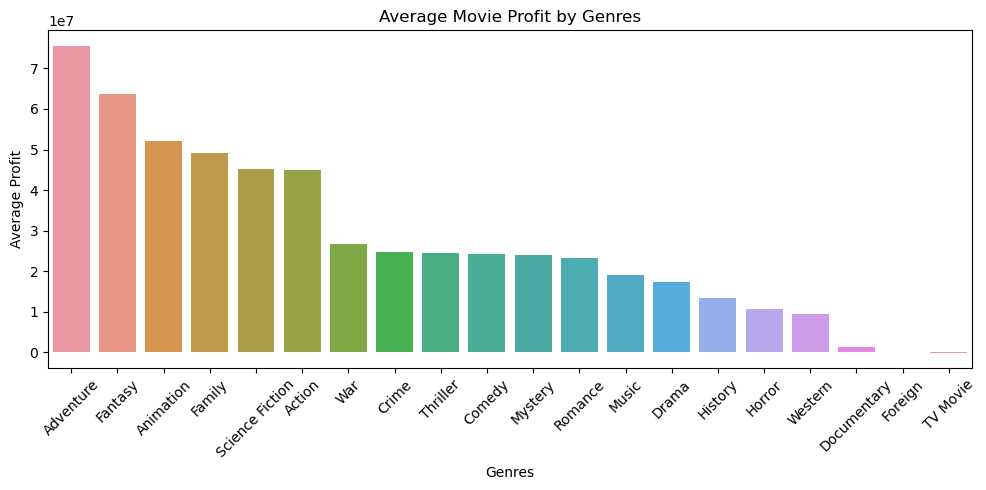

In [99]:
sort_profit = md_genre_profit.sort_values(by='profit',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='genres',y='profit',data=sort_profit)
plt.title('Average Movie Profit by Genres')
plt.xlabel('Genres')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The top 5 genres in term of Average Profit are :-
1. Adventure
2. Fantasy
3. Animation
4. Family
5. Science Fiction

### 4. Which genres have high number of movies with an Voting Average >= 8 ?

In [100]:
md_vg = md[md['vote_average']>=8]
movie_vg = (pd.DataFrame(md_vg.groupby('genres').original_title.nunique())).sort_values('original_title',ascending=False).reset_index()
movie_vg

,genres,original_title
0,Documentary,34
1,Drama,30
2,Music,20
3,Comedy,14
4,Crime,12
5,Animation,9
6,Thriller,8
7,Family,7
8,Science Fiction,7
9,Romance,5


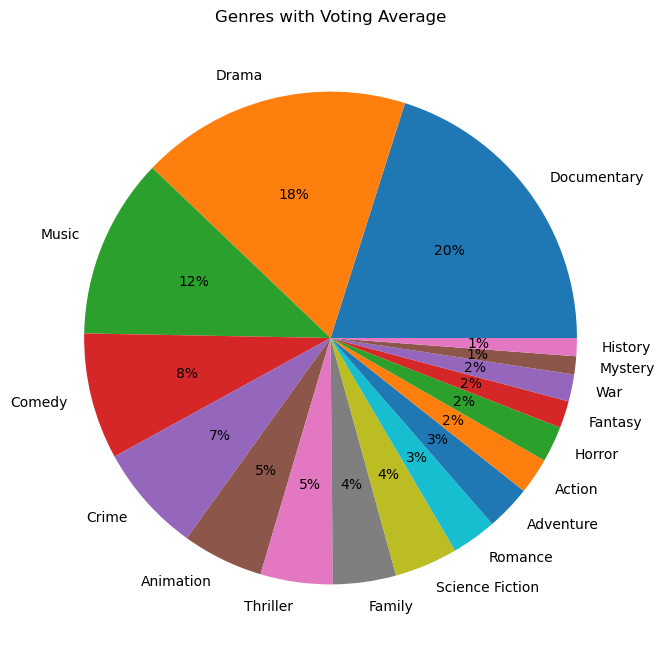

In [101]:
plt.figure(figsize=(8,8))
plt.pie(x=movie_vg['original_title'],labels=movie_vg['genres'],autopct='%0.0f%%')
plt.title('Genres with Voting Average')
plt.show()

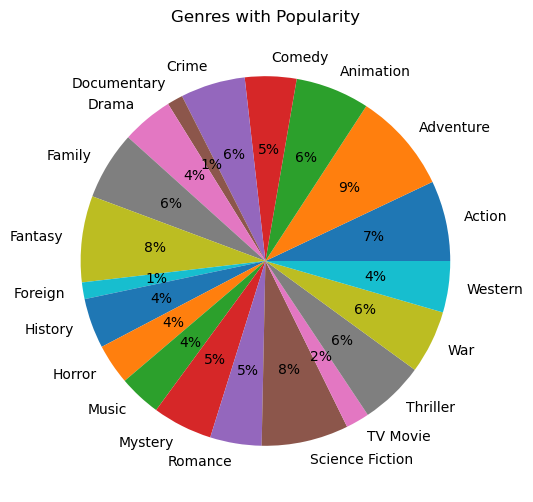

In [114]:
plt.figure(figsize=(6,6))
plt.pie(x=md_genre_pop['popularity'],labels=md_genre_pop['genres'],autopct='%0.0f%%')
plt.title('Genres with Popularity')
plt.show()

#### The genre Documentary has the most movies with a rating of at least 8

### 5. Which year we have more movies released ?

In [112]:
ynum_movie = md_year['original_title'].nunique().sort_values(ascending=False)
print(ynum_movie)

release_year
2014    699
2013    655
2015    627
2012    584
2011    540
2009    531
2008    495
2010    487
2007    438
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    223
1998    210
1996    202
1997    192
1994    184
1993    178
1995    174
1988    145
1989    136
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1976     47
1974     46
1966     46
1975     44
1964     42
1972     40
1970     40
1967     40
1968     39
1965     35
1963     34
1962     32
1960     32
1961     31
1969     31
Name: original_title, dtype: int64


## Some Other Insights

In [111]:
md_without = md.drop(columns=['original_title','genres'],inplace=False)
md_without.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
popularity,1.000000,0.541758,0.665801,0.142398,0.794882,0.233379,0.110153,0.632345
budget,0.541758,1.000000,0.729429,0.201128,0.641743,0.101052,0.147880,0.564370
revenue,0.665801,0.729429,1.000000,0.171686,0.798649,0.195299,0.081189,0.976371
runtime,0.142398,0.201128,0.171686,1.000000,0.174363,0.158572,-0.135148,0.143654
vote_count,0.794882,0.641743,0.798649,0.174363,1.000000,0.279316,0.131383,0.761081
vote_average,0.233379,0.101052,0.195299,0.158572,0.279316,1.000000,-0.125364,0.203765
release_year,0.110153,0.147880,0.081189,-0.135148,0.131383,-0.125364,1.000000,0.051263
profit,0.632345,0.564370,0.976371,0.143654,0.761081,0.203765,0.051263,1.000000


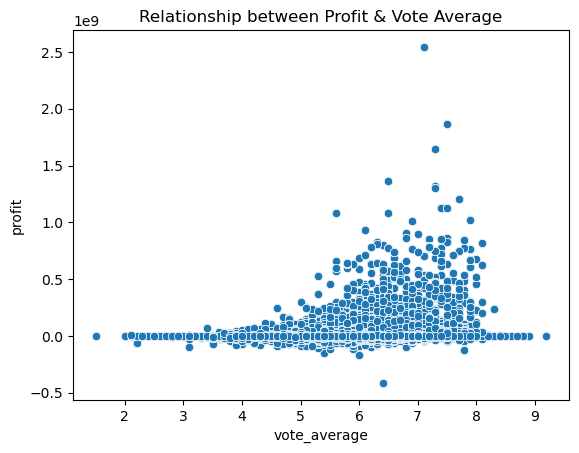

In [110]:
sns.scatterplot(x='vote_average',y='profit',data=md_without)
plt.title('Relationship between Profit & Vote Average')
plt.show()

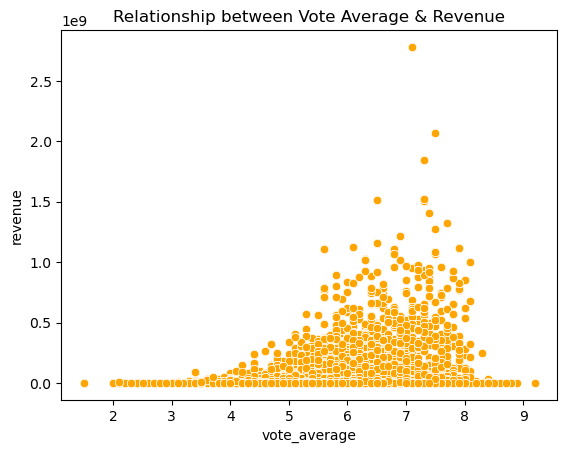

In [109]:
sns.scatterplot(x='vote_average',y='revenue',data=md_without,color='orange')
plt.title('Relationship between Vote Average & Revenue')
plt.show()

#### There is no clear positive linear relationship since a lot of movies have a high voting average, but only moderately profit and revenue. Both scatterplot are similar since profit is derived from revenue.

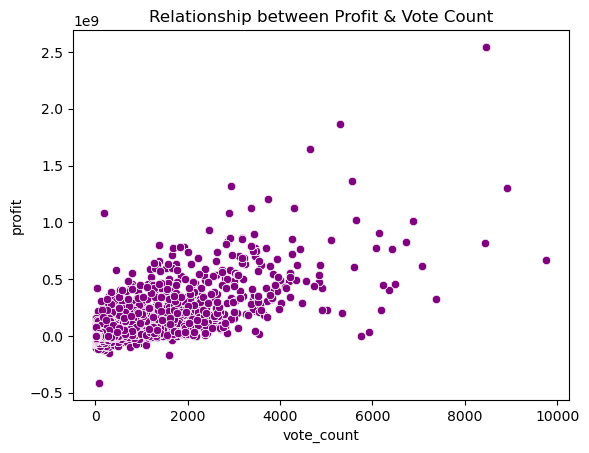

In [108]:
sns.scatterplot(x='vote_count',y='profit',data=md_without,color='purple')
plt.title('Relationship between Profit & Vote Count')
plt.show()

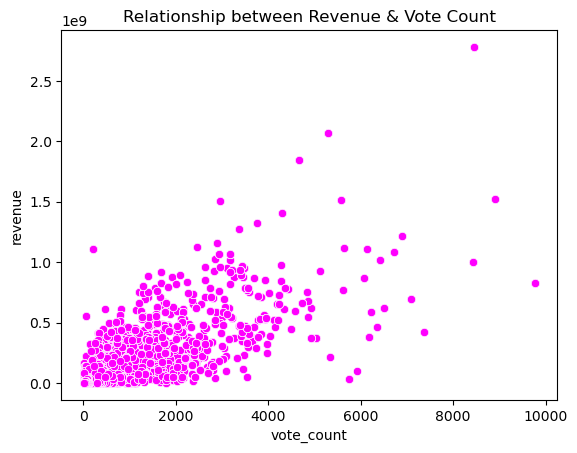

In [107]:
sns.scatterplot(x='vote_count',y='revenue',data=md_without,color='Magenta')
plt.title('Relationship between Revenue & Vote Count')
plt.show()

#### The strongest linear relationship is evident between profit/revenue and vote count.

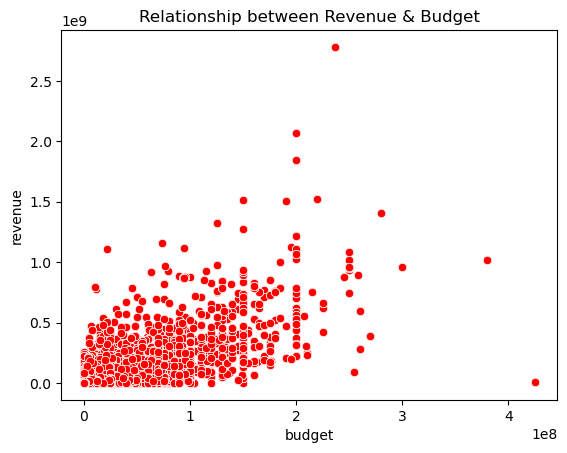

In [106]:
sns.scatterplot(x='budget',y='revenue',data=md_without,color='red')
plt.title('Relationship between Revenue & Budget')
plt.show()

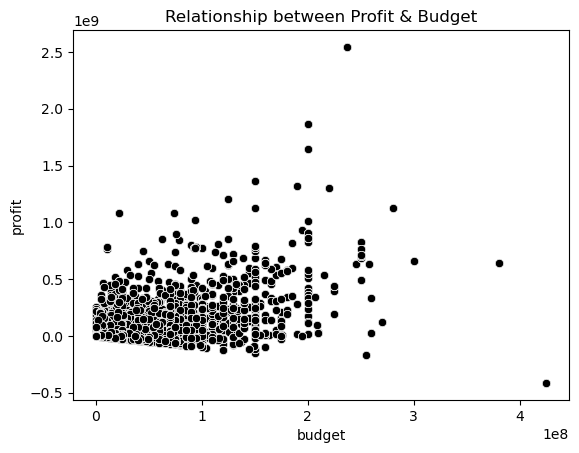

In [105]:
sns.scatterplot(x='budget',y='profit',data=md_without,color='black')
plt.title('Relationship between Profit & Budget')
plt.show()

#### The correlation coefficient between budget and revenue is ~0.733. Here we have a strong linear relationship. Highly budgeted movies return in general higher revenue
#### For budget and profit we find evidence for a moderate linear relationship with a coefficient of ~0.570.

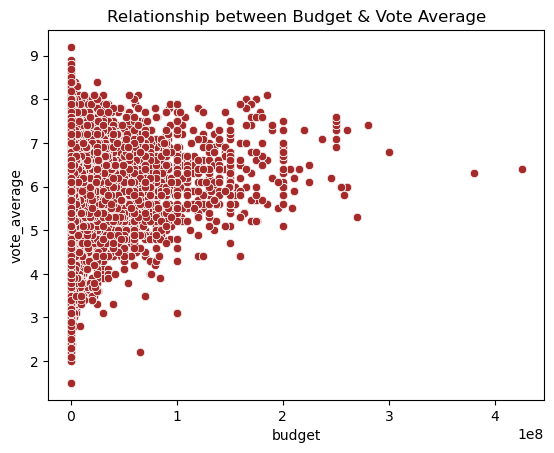

In [103]:
sns.scatterplot(x='budget',y='vote_average',data=md_without,color='brown')
plt.title('Relationship between Budget & Vote Average')
plt.show()

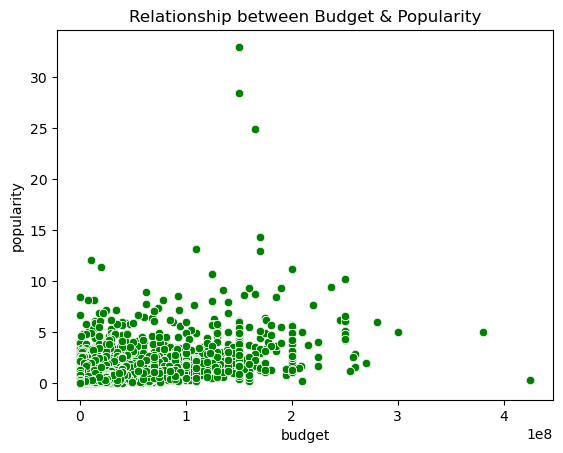

In [104]:
sns.scatterplot(x='budget',y='popularity',data=md_without,color='green')
plt.title('Relationship between Budget & Popularity')
plt.show()

#### A movie having a high budget does not mean that it will receive a high voting average.
#### Movies with a moderate budget seems to have moderately higher popularity.